In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [13]:
#Data collection and processing-->loading the CSV data into pandas dataframe

gold_data=pd.read_csv('gld_price_data.csv')
gold_data.head()



,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [14]:
#print last 5 rows of the data frame

gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [15]:
#No of rows & columns
gold_data.shape

(2290, 6)

In [16]:
#getting the basic information of data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [17]:
#checking the no of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [18]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [19]:
#correlation of data set

correlation= gold_data.corr()

C:\Users\spman\AppData\Local\Temp\ipykernel_4812\718189195.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation= gold_data.corr()


<Axes: >

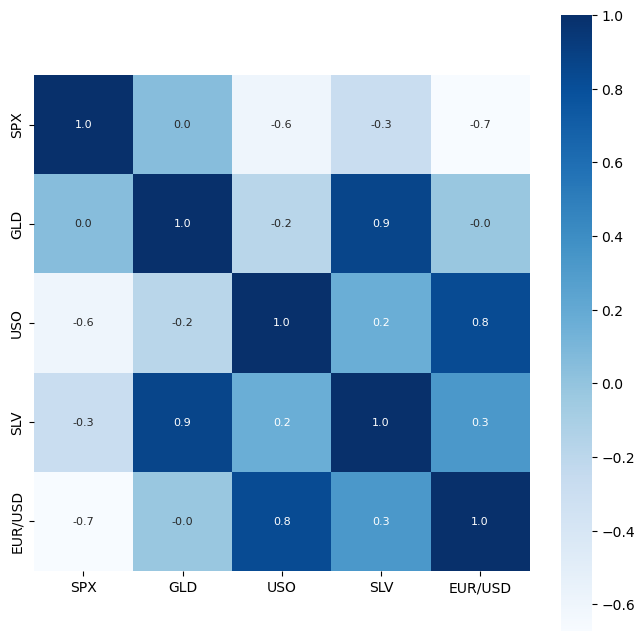

In [24]:
#constructing the heat map to understand the correlation

plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [25]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\spman\AppData\Local\Temp\ipykernel_4812\3428114967.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

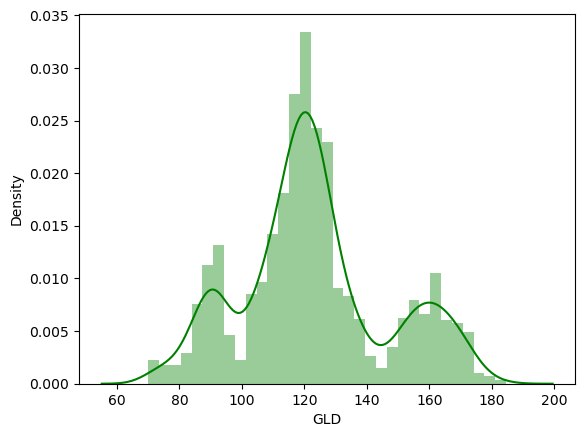

In [27]:
#check the distribution of gold price

sns.distplot(gold_data['GLD'],color='green')

In [30]:
#Splitting the Features & Target

X= gold_data.drop(['Date','GLD'],axis=1)
Y= gold_data['GLD']

In [31]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [32]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [33]:
# splitting into training data & test data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
regressor=RandomForestRegressor(n_estimators= 100)

In [34]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [37]:
#Model Evaluation
#prediction on the test data
test_data_prediction=regressor.predict(X_test)

In [38]:
print(test_data_prediction)

[168.48199925  81.87120015 116.26410056 127.73650071 120.72560098
 154.60669723 150.1248979  126.14020027 117.4560988  125.88360094
 116.5020014  171.59710036 141.2573986  167.83919878 115.22770027
 117.61000031 137.31430346 169.93420066 159.65900339 157.5696999
 155.14580057 125.08050012 177.14469979 157.40720354 125.1894004
  94.00429978  76.9745002  120.67200011 119.1517994  167.51329958
  88.08430061 125.38980006  91.36810043 117.73700045 121.13449911
 135.93240073 115.39150119 115.10420054 146.09489939 106.84240089
 104.18950245  87.09019777 126.5353005  117.90720017 153.0424991
 119.81219956 108.42509955 108.41509866  93.2008007  127.06669819
  75.2645006  113.69819939 121.44670012 111.28139937 119.07029914
 120.32289991 158.58929999 167.13830124 146.99359676  85.75149844
  94.16560035  86.89319909  90.63520052 119.19120047 126.52060096
 127.56169983 170.70410012 122.29389944 117.24169907  98.85770043
 168.3215015  143.13489796 131.85270225 121.11880219 120.78399944
 119.5993004 

In [39]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error:',error_score)

R squared error: 0.9892740173856825


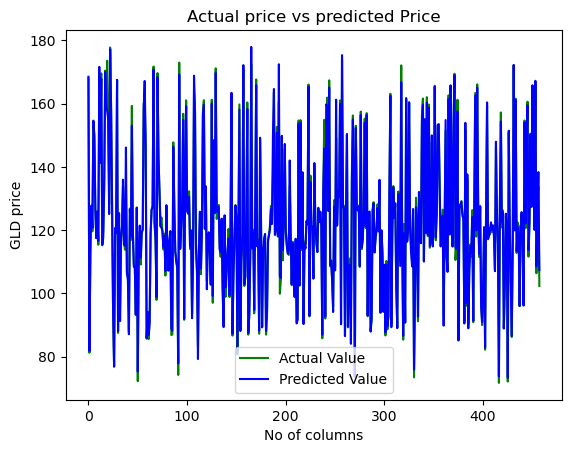

In [42]:
#compare the actual values & predicted values
Y_test=list(Y_test)
plt.plot(Y_test,color='green',label='Actual Value')
plt.plot(test_data_prediction,color='blue',label='Predicted Value')
plt.title('Actual price vs predicted Price')
plt.xlabel('No of columns')
plt.ylabel('GLD price')
plt.legend()
plt.show()